In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from copy import deepcopy
import pywt 
from numpy.fft import fft, fftfreq, rfft
%matplotlib inline 

In [2]:
inp = np.load('tmp/all123.npz')
f1 = inp['f1'] # force in format: (experiment, label, fx, fy, fz)
l1 = np.array([fi[:,1] for fi in f1])
f1 = np.array([fi[:,2:] for fi in f1])
f2 = inp['f2']
l2 = np.array([fi[:,1] for fi in f2])
f2 = np.array([fi[:,2:] for fi in f2])
details = inp['details'] # details in format: (force, trajectory, repetitions, surface)
f1d = details
f2d = details
i = range(len(f1))
print 1,f1.shape, l1.shape, f1d.shape
print 2,f2.shape, l2.shape, f2d.shape
print details,i

1 (19,) (19,) (19, 4, 1)
2 (19,) (19,) (19, 4, 1)
[[['f1=f2=1N']
  ['15cm15sec']
  ['5reps']
  ['blue_smooth']]

 [['f1=f2=1N']
  ['15cm05sec']
  ['5reps']
  ['blue_smooth']]

 [['f1=f2=1N']
  ['15cm10sec']
  ['5reps']
  ['blue_smooth']]

 [['f1=f2=2N']
  ['15cm15sec']
  ['3reps']
  ['blue_smooth']]

 [['f1=f2=2N']
  ['15cm10sec']
  ['3reps']
  ['blue_smooth']]

 [['f1=f2=2N']
  ['15cm05sec']
  ['3reps']
  ['blue_smooth']]

 [['f1=f2=2N']
  ['15cm15sec']
  ['3reps']
  ['banana_paper']]

 [['f1=f2=2N']
  ['15cm05sec']
  ['3reps']
  ['banana_paper']]

 [['f1=f2=2N']
  ['15cm10sec']
  ['3reps']
  ['banana_paper']]

 [['f1=f2=1N']
  ['15cm15sec']
  ['3reps']
  ['banana_paper']]

 [['f1=f2=1N']
  ['15cm05sec']
  ['3reps']
  ['banana_paper']]

 [['f1=f2=1N']
  ['15cm10sec']
  ['3reps']
  ['banana_paper']]

 [['f1=f2=1N']
  ['15cm15sec']
  ['3reps']
  ['black_sandpaper']]

 [['f1=f2=1N']
  ['15cm05sec']
  ['3reps']
  ['black_sandpaper']]

 [['f1=f2=1N']
  ['15cm10sec']
  ['3reps']
  ['black_s

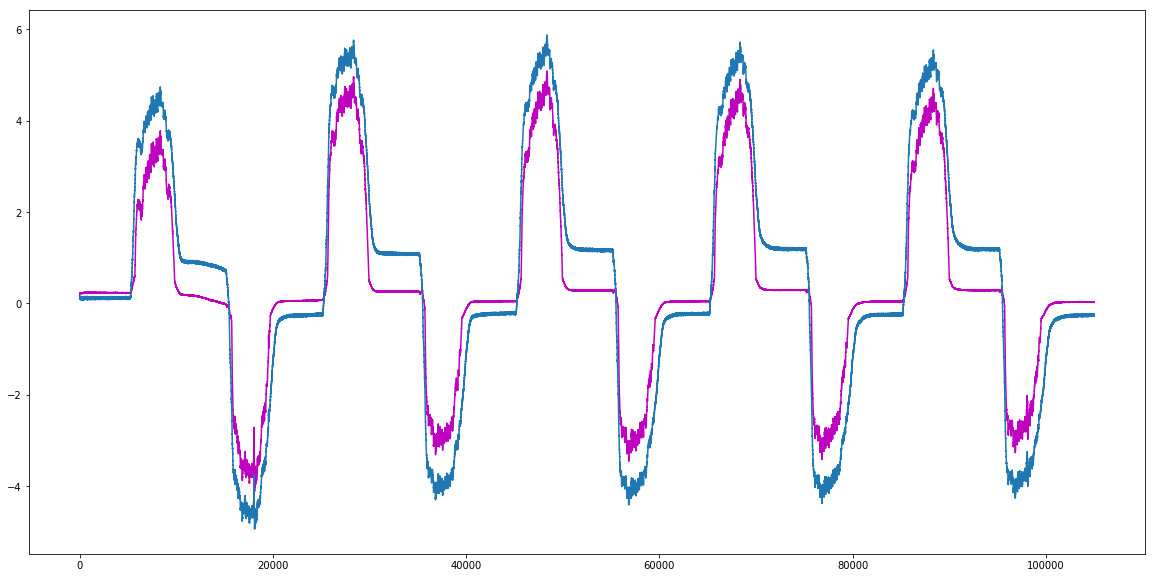

In [3]:
from scipy.signal import wiener, medfilt

wth = deepcopy(f1[1])
filtered = wiener(wth)
plt.figure(figsize = (20,10))
plt.plot(filtered[:,0],'m')
plt.hold
plt.plot(f1[1][:,0])

In [4]:
from_r = 0
# to_r = 1500
newprefeat = deepcopy(f1)
nprefeat = []
for d_ind, d in enumerate(newprefeat):
    print(d_ind)
    X = d[from_r:,:]
#     y = l1[d_ind]
    npre = np.zeros_like(X)
    for n_axis in range(X.shape[1]):
        npre[:,n_axis] = fft(X[:,n_axis]).real
    nprefeat.append(npre)

print(len(nprefeat))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


IndexError: list index out of range

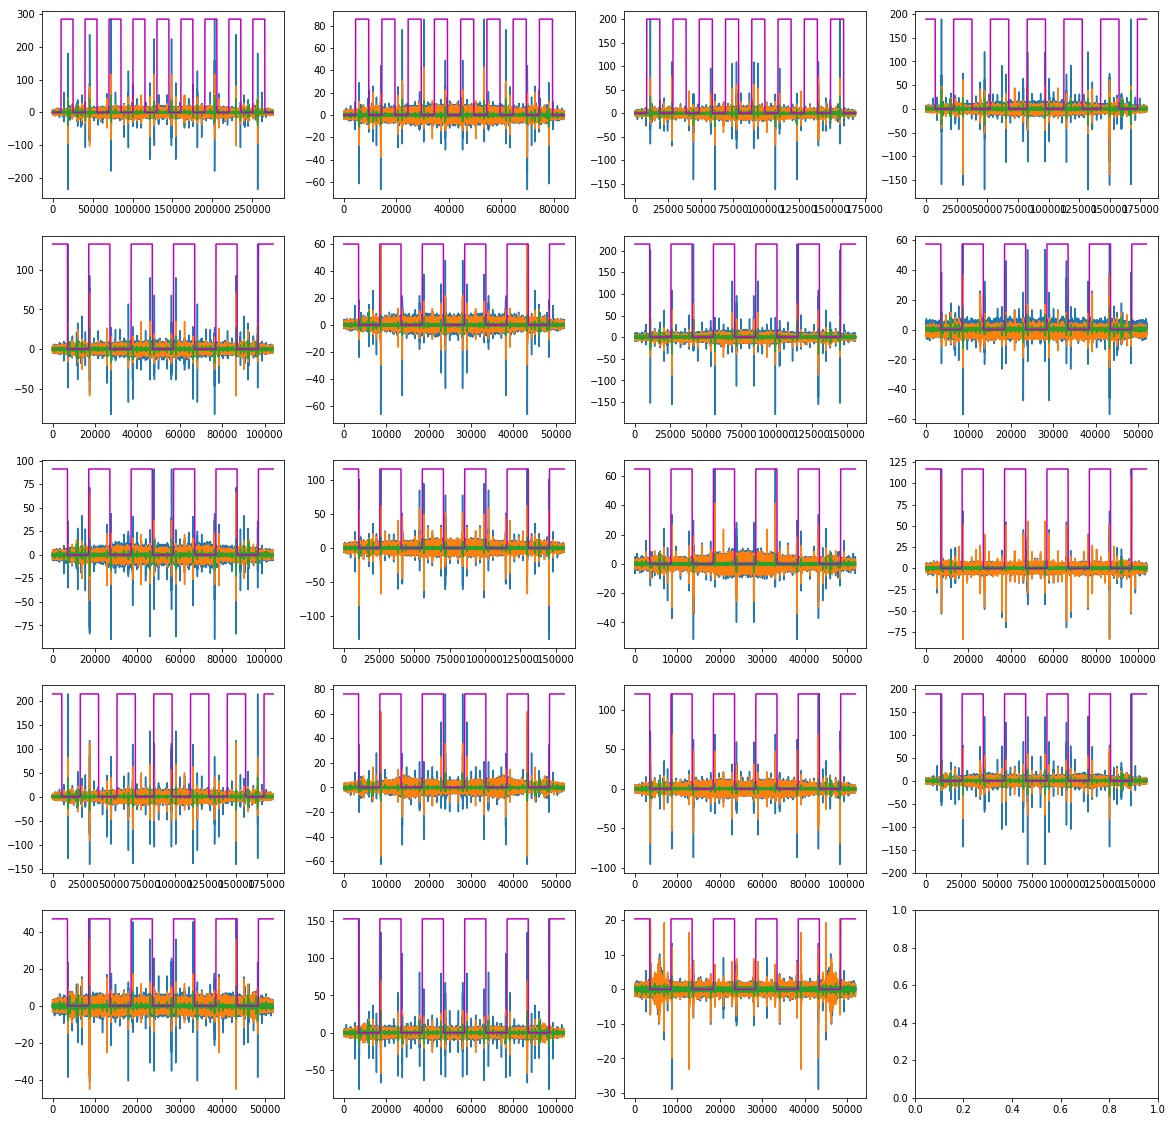

In [6]:
x = [nprefeat[i] for i in range(len(nprefeat))] #np.arange(11)
# scl = MinMaxScaler(feature_range=(0,1))
# x = [scl.fit_transform(x[i] )for i in range(len(nprefeat))]
y = [l1[i] for i in range(len(l1))] # np.random.rand(len(x), 50)*10
from_r = [int(np.ceil(0.1*nprefeat[i].shape[0])) for i in range(len(nprefeat))]
to_r = [int(np.ceil(0.9*nprefeat[i].shape[0])) for i in range(len(nprefeat))]

fig, axes = plt.subplots(5,4, sharex=False, sharey=False, figsize = (20,20))
for i, ax in enumerate(axes.flatten()):
    ax.plot(x[i][from_r[i]:to_r[i],:])
    ax.hold
    ax.plot((y[i][from_r[i]:to_r[i]])*np.amax(x[i][from_r[i]:to_r[i],:]),'m') #color=plt.cm.Paired(i/50.)
#     ax.plot(x[i])
#     ax.hold
#     ax.plot(y[i],'m') #color=plt.cm.Paired(i/50.)

plt.show()

In [7]:
from_r = 0
# to_r = 1500
newprefeat = deepcopy(f1)
nprefeat2 = []
for d_ind, d in enumerate(newprefeat):
    print(d_ind)
    X = d[from_r:,:]
    npre2 = np.zeros(((X.shape[0]/2)+1,X.shape[1]))
    for n_axis in range(X.shape[1]):
        npre2[:,n_axis] = rfft(X[:,n_axis], axis = 0) 
    nprefeat2.append(npre2)

0


/home/jagrio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


IndexError: list index out of range

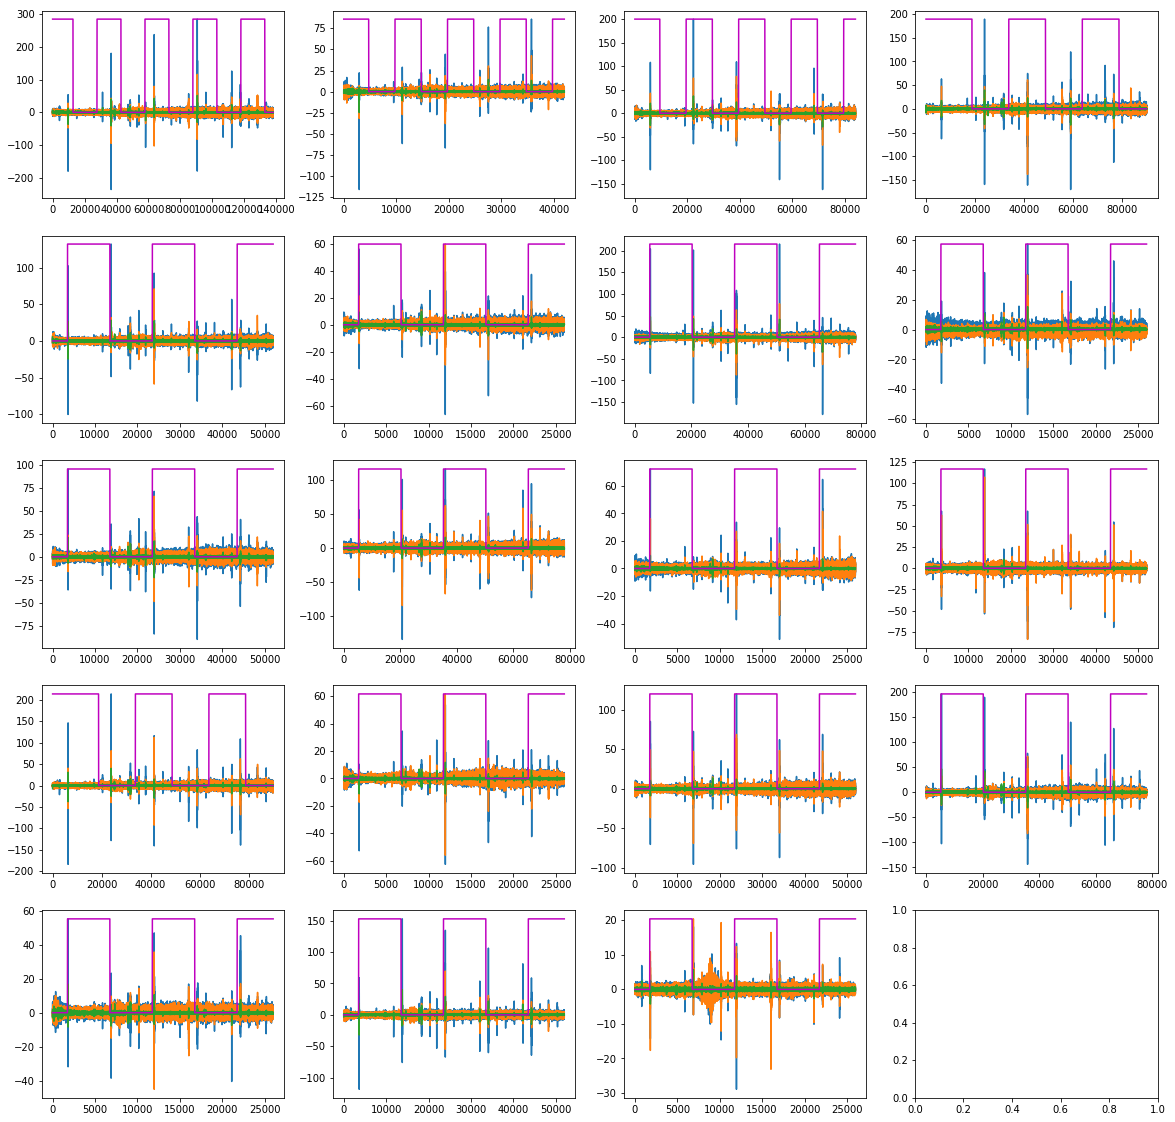

In [8]:
x = [nprefeat2[i] for i in range(len(nprefeat2))] #np.arange(11)
# scl = MinMaxScaler(feature_range=(0,1))
# x = [scl.fit_transform(x[i] )for i in range(len(nprefeat))]
y = [l1[i] for i in range(len(l1))] # np.random.rand(len(x), 50)*10
from_r = [int(np.ceil(0.1*nprefeat2[i].shape[0])) for i in range(len(nprefeat2))]
to_r = [int(np.ceil(0.9*nprefeat2[i].shape[0])) for i in range(len(nprefeat2))]

fig, axes = plt.subplots(5,4, sharex=False, sharey=False, figsize = (20,20))

for i, ax in enumerate(axes.flatten()):
    ax.plot(x[i][from_r[i]:to_r[i],:])
    ax.hold
    ax.plot((y[i][from_r[i]:to_r[i]])*np.amax(x[i][from_r[i]:to_r[i],:]),'m') #color=plt.cm.Paired(i/50.)
#     ax.plot(x[i])
#     ax.hold
#     ax.plot(y[i],'m') #color=plt.cm.Paired(i/50.)

plt.show()

In [9]:
from_r = 0
# to_r = 1500
level = 10
nprefeatcwt = []
newprefeat = deepcopy(f1)
for d_ind, d in enumerate(newprefeat):
    X = d[from_r:,:]
    y = l1[d_ind]
    npre = np.zeros_like(X)
    for n_axis in range(X.shape[1]):
        npre_tot, freq = pywt.cwt(X[:,n_axis], np.arange(1,20), 'gaus1') # coef = (lvls) x (intances)
        npre[:,n_axis] = npre_tot[level,:]
#     print(coef.shape, y.shape)
#     npre = np.concatenate((npre,y[:,np.newaxis]), axis = 1)
    nprefeatcwt.append(npre)

IndexError: list index out of range

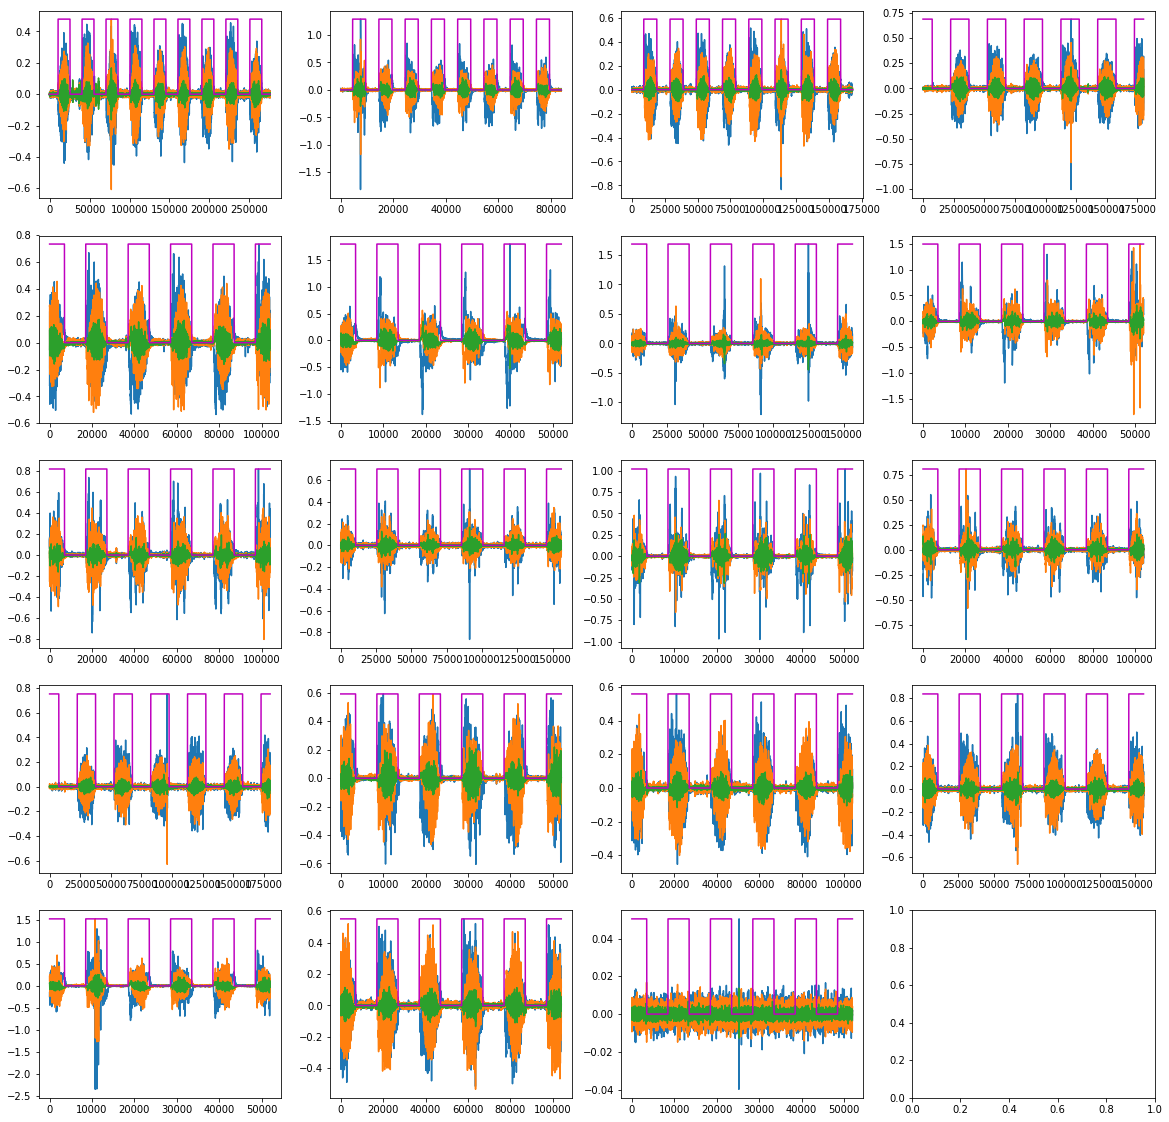

In [10]:
x = [nprefeatcwt[i] for i in range(len(nprefeatcwt))] #np.arange(11)
# scl = MinMaxScaler(feature_range=(0,1))
# x = [scl.fit_transform(x[i] )for i in range(len(nprefeat))]
y = [l1[i] for i in range(len(l1))] # np.random.rand(len(x), 50)*10
from_r = [int(np.ceil(0.1*nprefeatcwt[i].shape[0])) for i in range(len(nprefeatcwt))]
to_r = [int(np.ceil(0.9*nprefeatcwt[i].shape[0])) for i in range(len(nprefeatcwt))]

fig, axes = plt.subplots(5,4, sharex=False, sharey=False, figsize = (20,20))

for i, ax in enumerate(axes.flatten()):
    ax.plot(x[i][from_r[i]:to_r[i],:])
    ax.hold
    ax.plot((y[i][from_r[i]:to_r[i]])*np.amax(x[i][from_r[i]:to_r[i],:]),'m') #color=plt.cm.Paired(i/50.)
#     ax.plot(x[i])
#     ax.hold
#     ax.plot(y[i],'m') #color=plt.cm.Paired(i/50.)

plt.show()

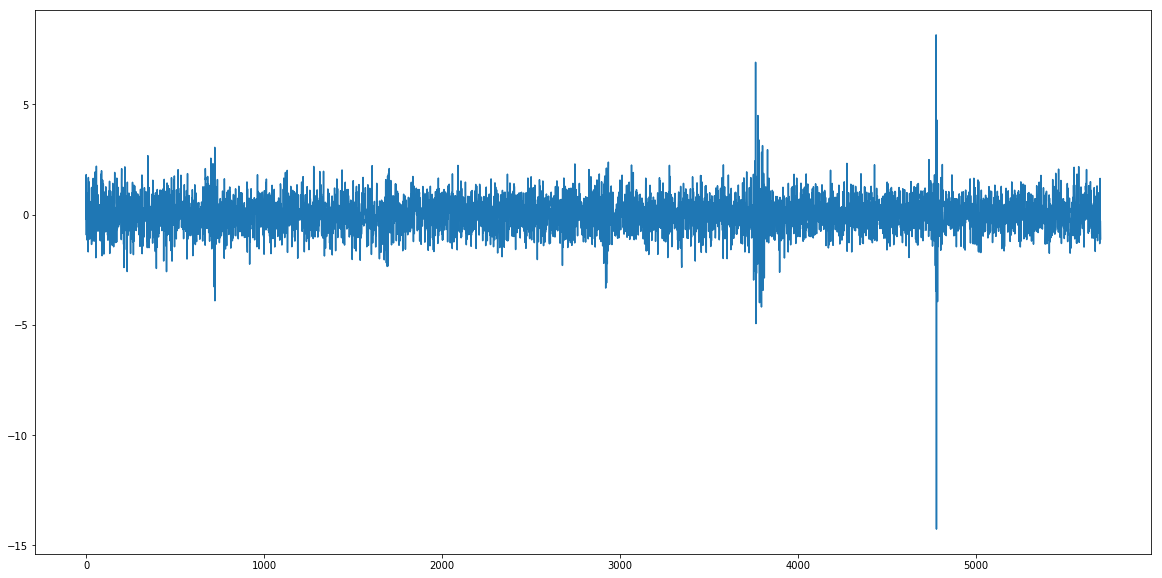

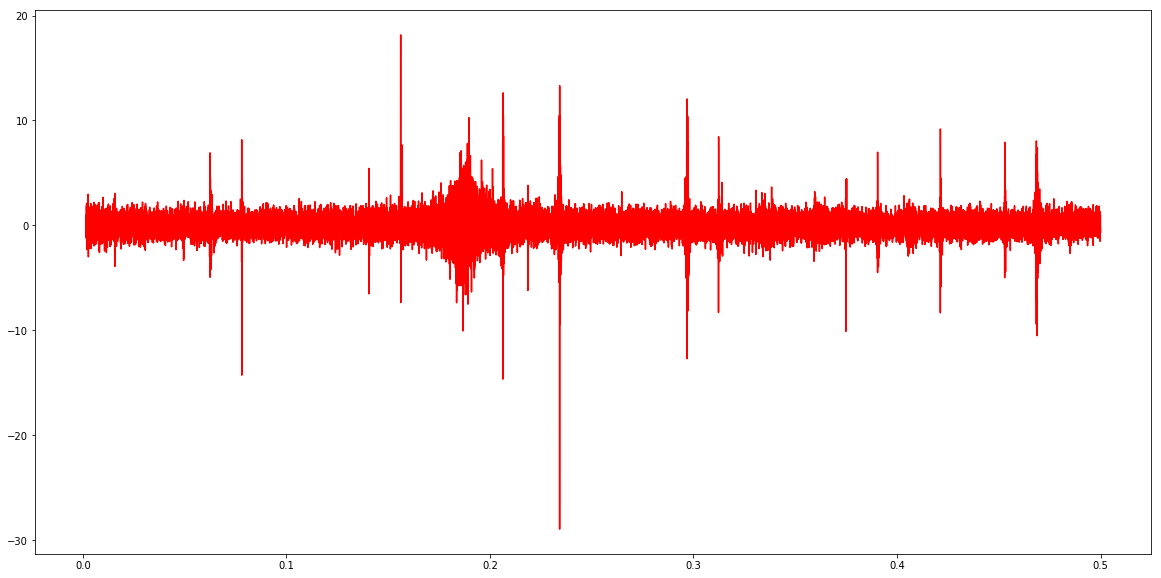

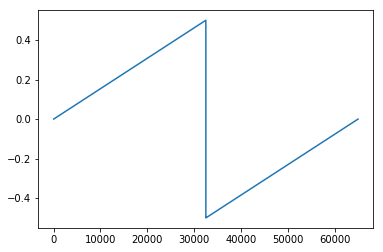

In [4]:
noise = f1[-1][:,0]
n_s = fft(noise, axis = 0).real
fr = np.fft.fftfreq(noise.shape[0])
plt.figure(1, figsize = (20,10))
plt.plot(n_s[300:6000])
plt.figure(2, figsize = (20,10))
plt.plot(fr[100:32500],n_s[100:32500],'r')
plt.figure(3)
plt.plot(fr)

In [13]:
noise.shape

(65001,)

/home/jagrio/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


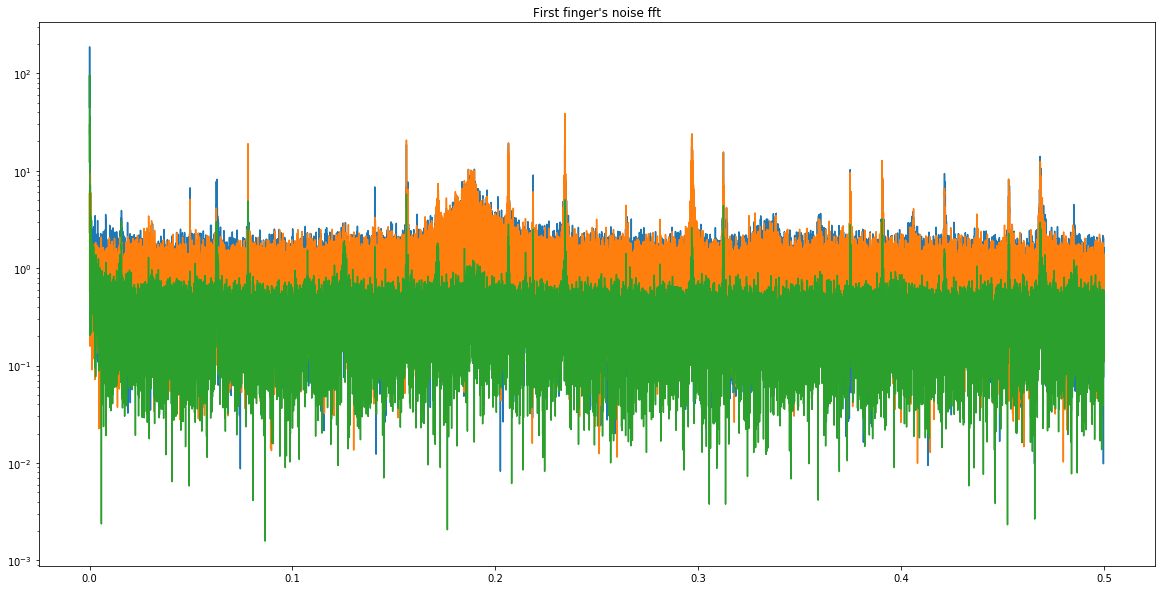

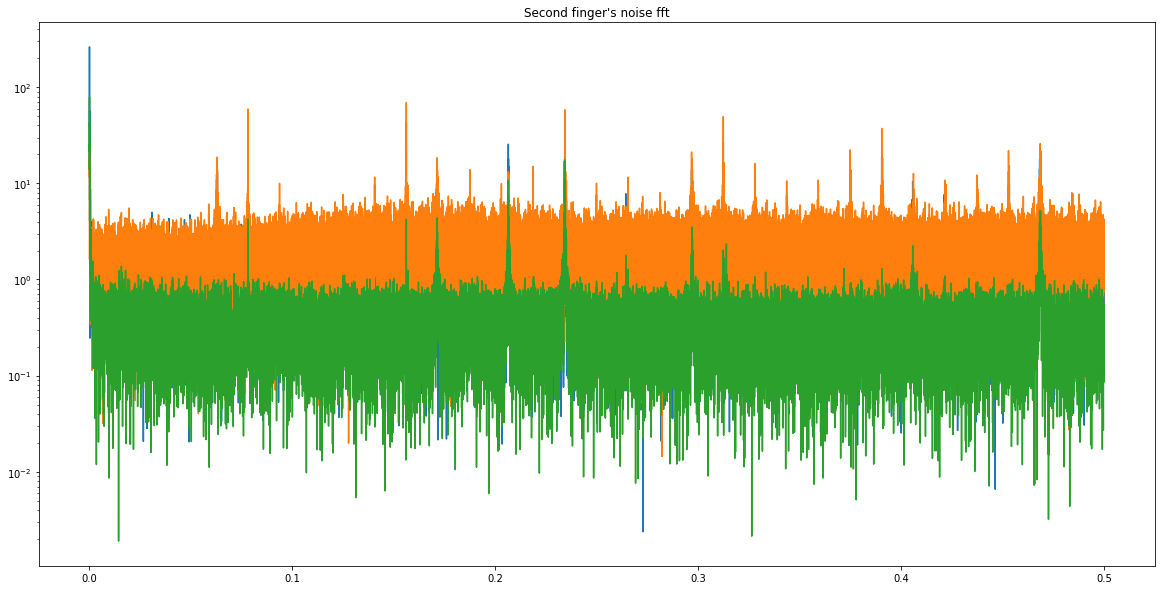

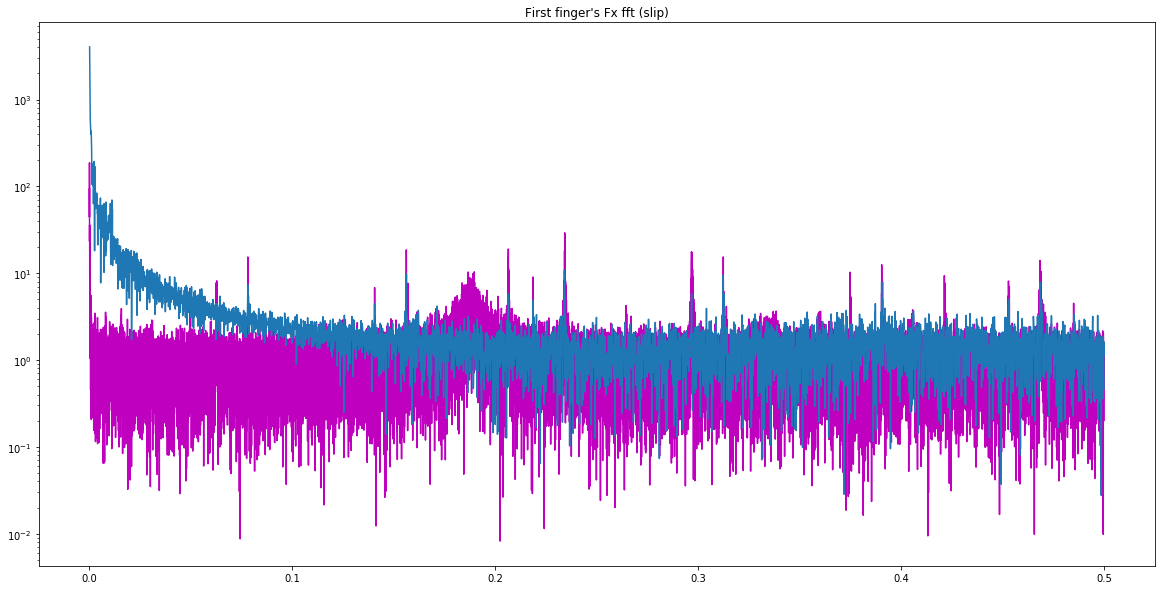

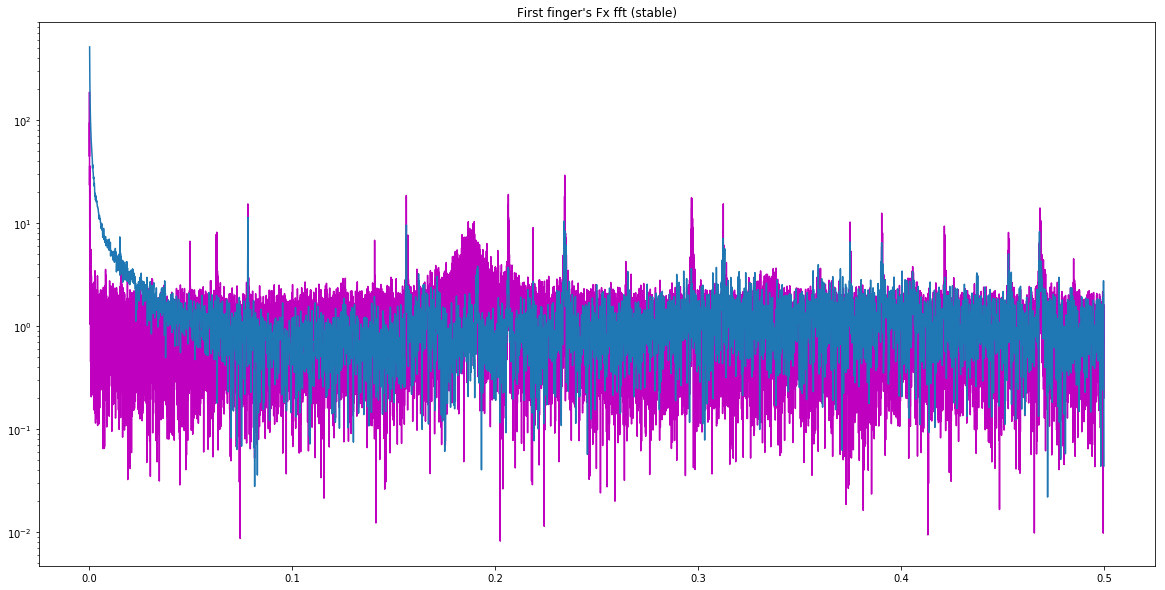

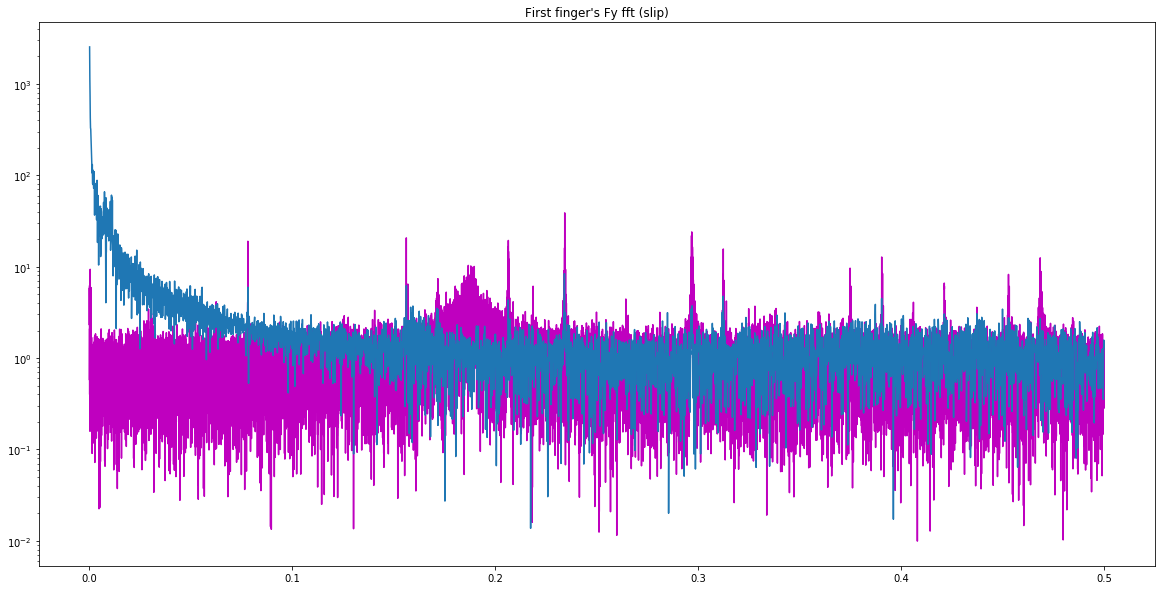

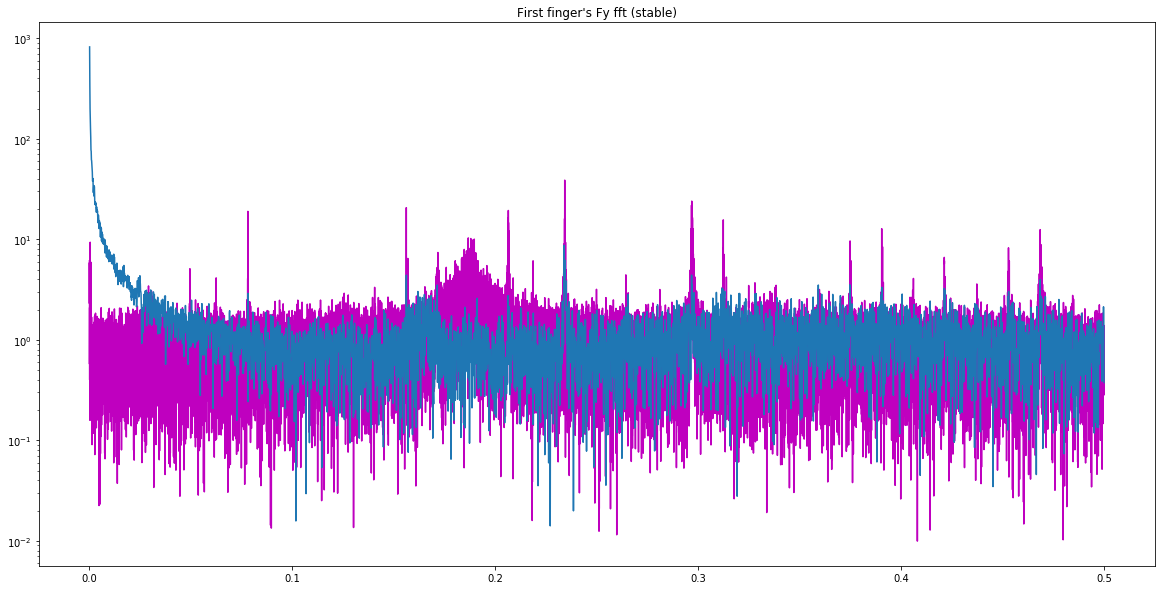

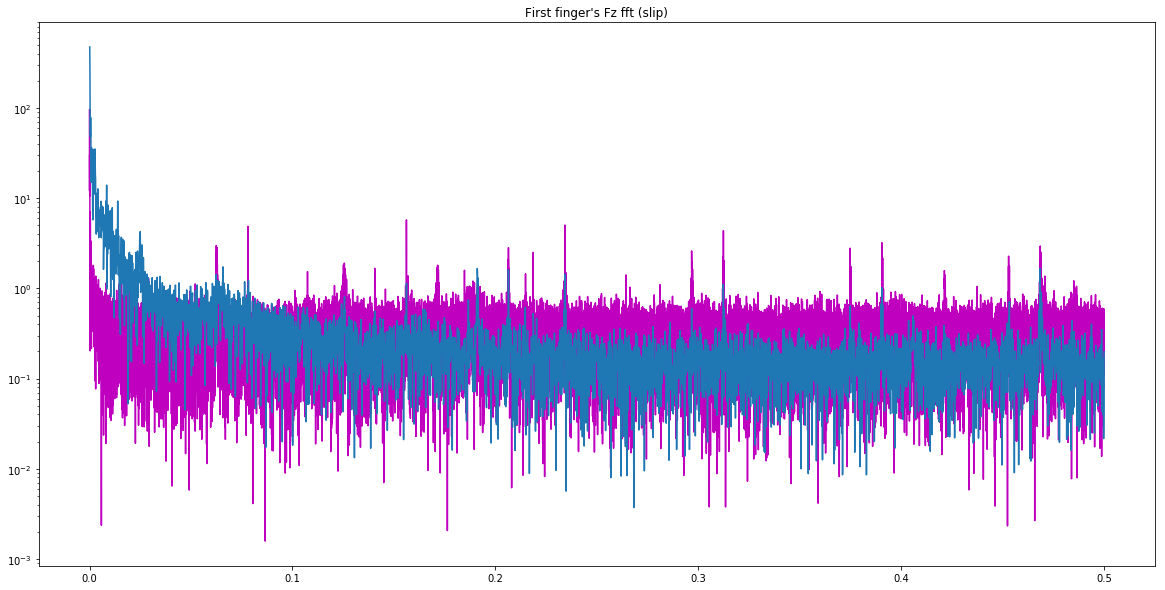

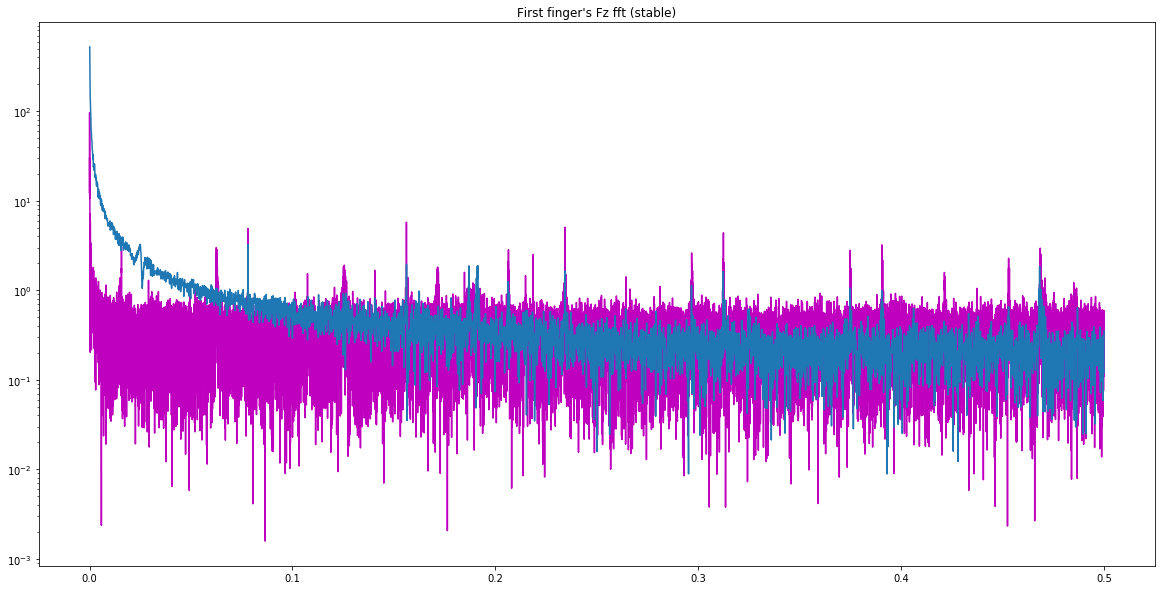

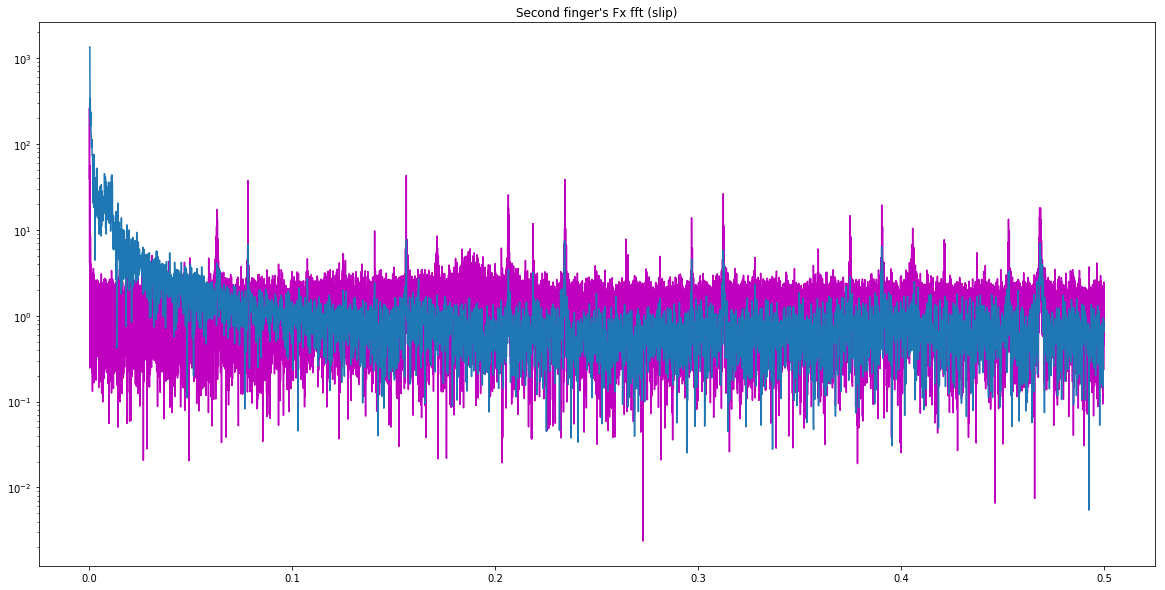

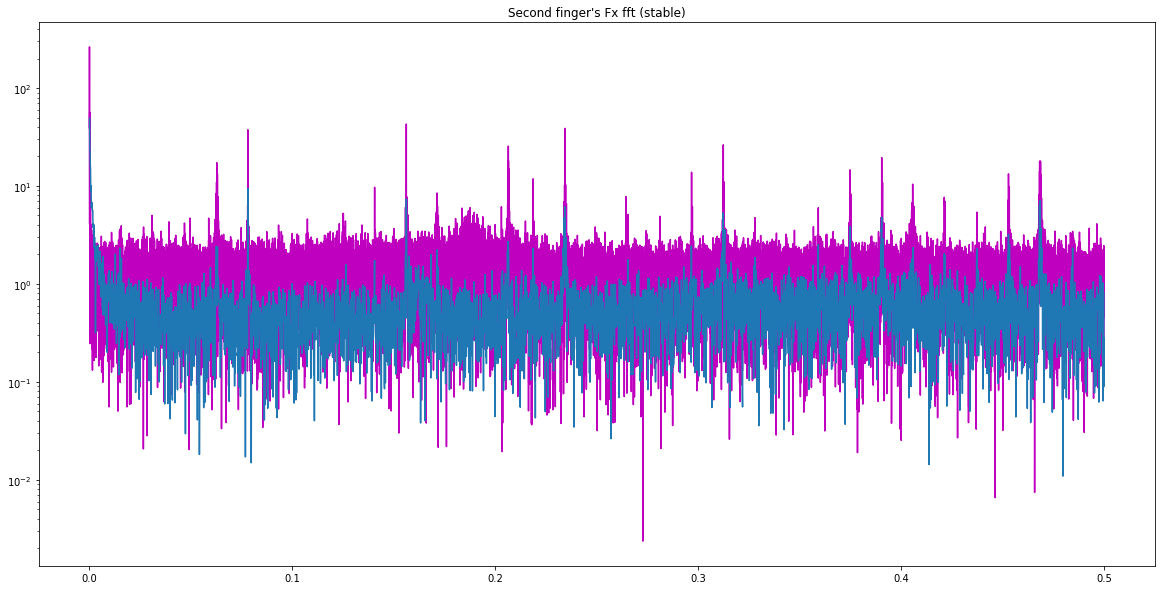

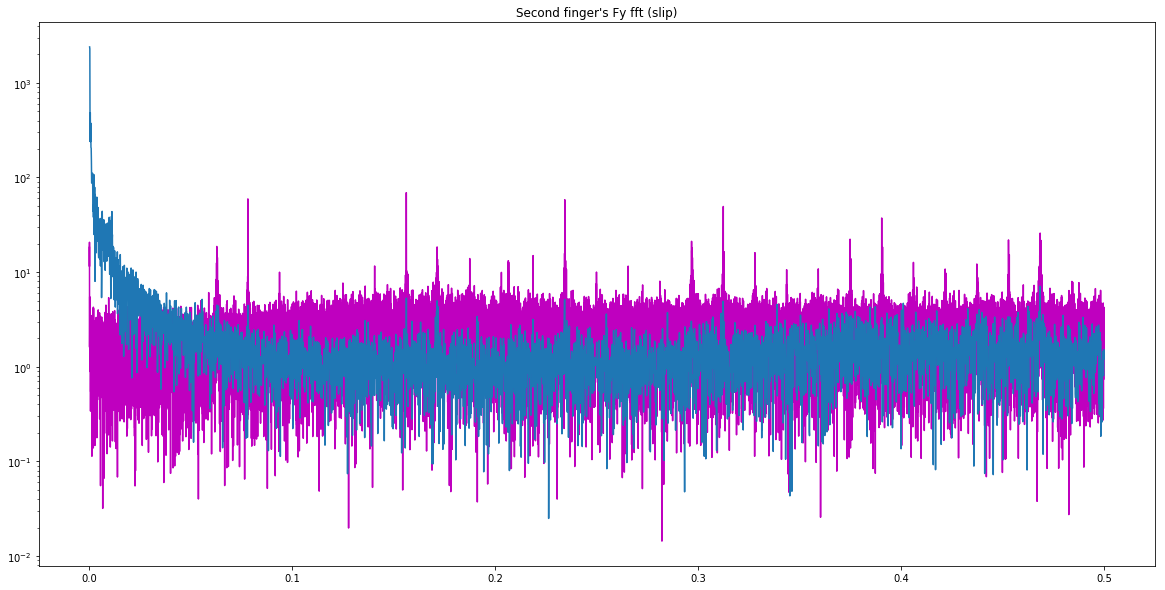

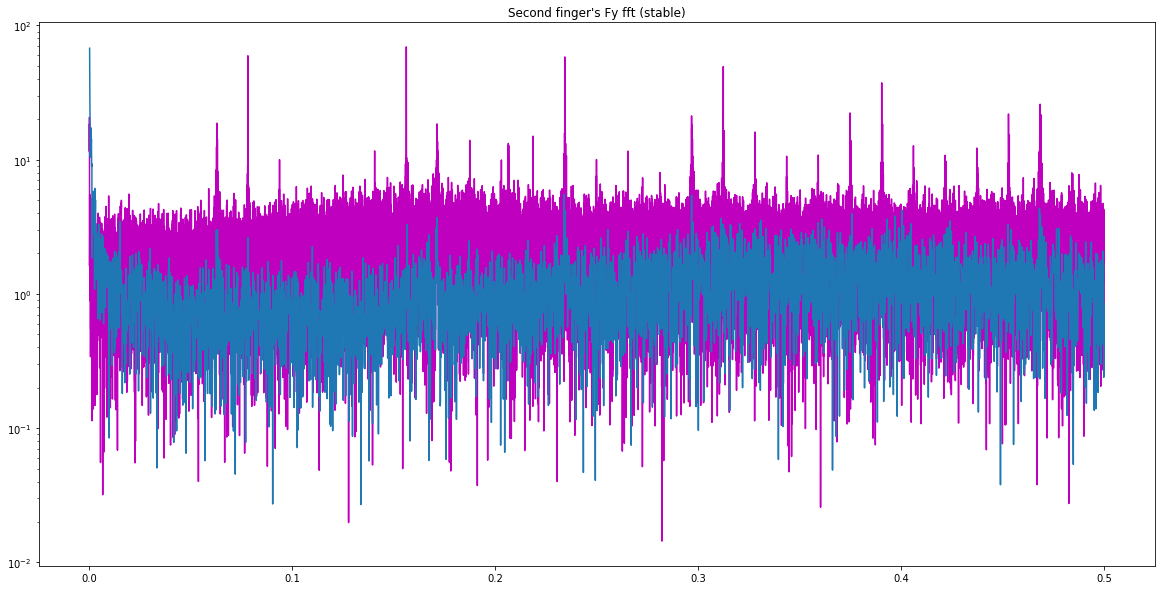

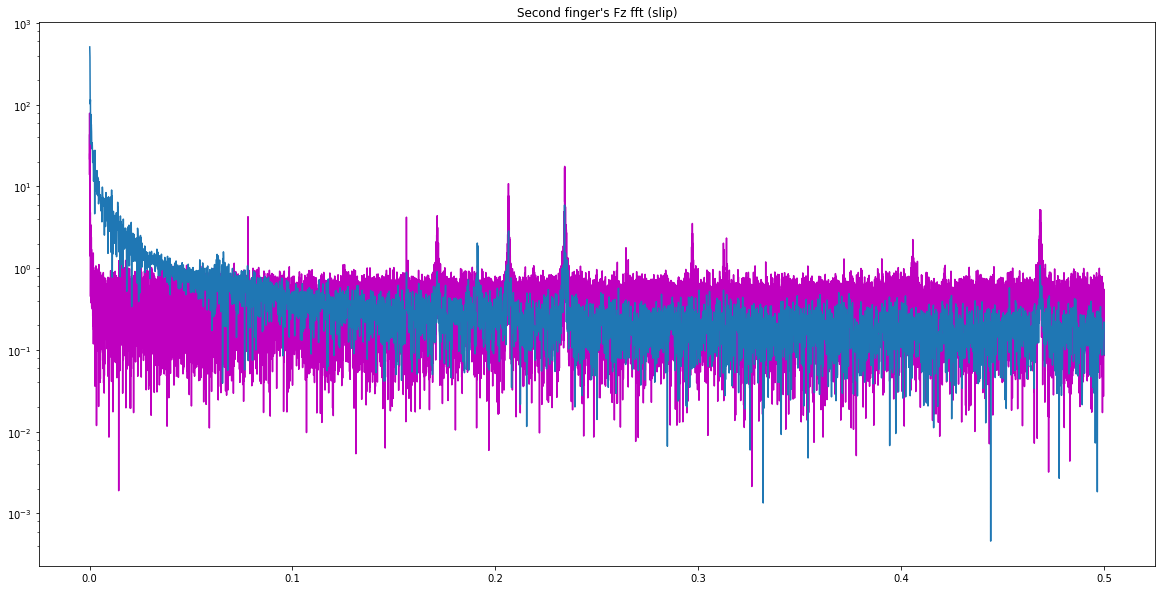

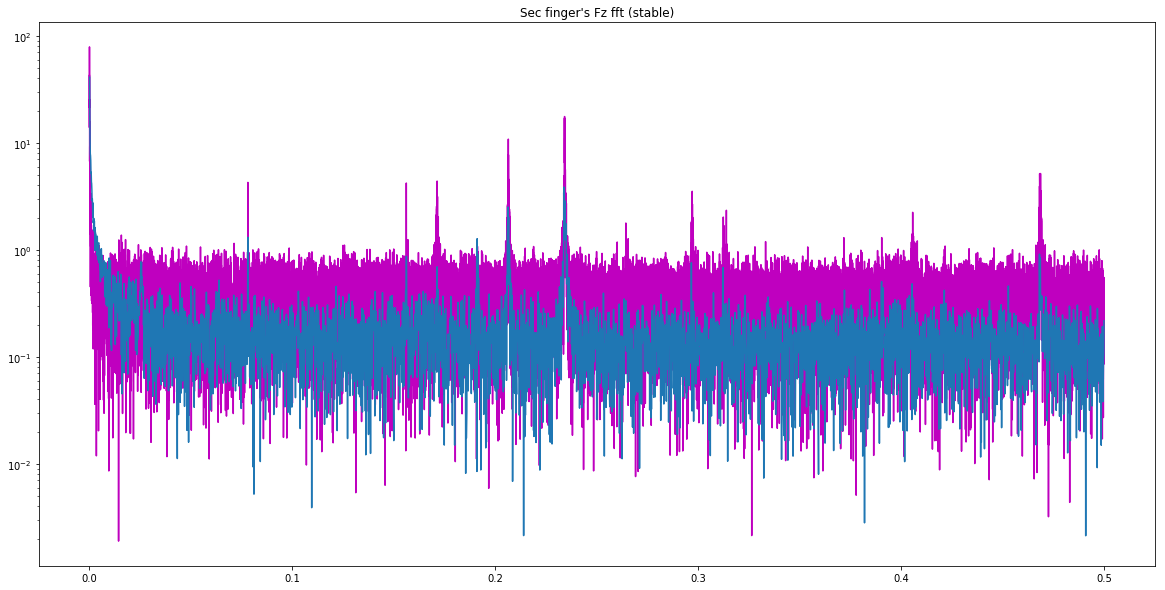

In [5]:
from_r = 1

# Get the noise's RFT for each finger
noise_signal1 = f1[-1] 
noise_signal2 = f2[-1]
n_sp1 = np.abs(rfft(noise_signal1, axis = 0))
n_sp2 = np.abs(rfft(noise_signal2, axis = 0))
n1 = noise_signal1.shape[0]
freq1 = np.fft.rfftfreq(n1)


# Isolate a slip and a stable part from an object
slip_signal1 = f1[-5][10000:19000,:]
slip_signal2 = f2[-5][10000:19000,:]
slip_sp1 = np.abs(rfft(slip_signal1, axis = 0))
slip_sp2 = np.abs(rfft(slip_signal2, axis = 0))
n2 = slip_signal1.shape[0]
freq2 = np.fft.rfftfreq(n2)
# print(freq2.shape, slip_sp2.shape)

stable_signal1 = f1[-5][20000:29000,:]
stable_signal2 = f2[-5][20000:29000,:]
stable_sp1 = np.abs(rfft(stable_signal1, axis = 0))
stable_sp2 = np.abs(rfft(stable_signal2, axis = 0))
n3 = stable_signal1.shape[0]
freq3 = np.fft.rfftfreq(n3)


# plot all the transforms on the same plot(semilogy)
plt.figure(1, figsize = (20,10))
plt.title("First finger's noise fft")
plt.legend()
plt.semilogy(freq1[from_r:],n_sp1[from_r:,:])
plt.figure(2, figsize = (20,10))
plt.title("Second finger's noise fft")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,:])


# plot the force's signals for x-axis 
plt.figure(3, figsize = (20,10))
plt.title("First finger's Fx fft (slip)")
plt.semilogy(freq1[from_r:],n_sp1[from_r:,0],'m')
plt.hold
plt.semilogy(freq2[from_r:],slip_sp1[from_r:,0])
plt.figure(4, figsize = (20,10))
plt.title("First finger's Fx fft (stable)")
plt.semilogy(freq1[from_r:],n_sp1[from_r:,0],'m')
plt.hold
plt.semilogy(freq3[from_r:],stable_sp1[from_r:,0])

# plot the force's signals for y-axis 
plt.figure(5, figsize = (20,10))
plt.title("First finger's Fy fft (slip)")
plt.semilogy(freq1[from_r:],n_sp1[from_r:,1],'m')
plt.hold
plt.semilogy(freq2[from_r:],slip_sp1[from_r:,1])
plt.figure(6, figsize = (20,10))
plt.title("First finger's Fy fft (stable)")
plt.semilogy(freq1[from_r:],n_sp1[from_r:,1],'m')
plt.hold
plt.semilogy(freq3[from_r:],stable_sp1[from_r:,1])

# plot the force's signals for z-axis 
plt.figure(7, figsize = (20,10))
plt.title("First finger's Fz fft (slip)")
plt.semilogy(freq1[from_r:],n_sp1[from_r:,2],'m')
plt.hold
plt.semilogy(freq2[from_r:],slip_sp1[from_r:,2])
plt.figure(8, figsize = (20,10))
plt.title("First finger's Fz fft (stable)")
plt.semilogy(freq1[from_r:],n_sp1[from_r:,2],'m')
plt.hold
plt.semilogy(freq3[from_r:],stable_sp1[from_r:,2])

############### Second finger################
# plot the force's signals for x-axis 
plt.figure(9, figsize = (20,10))
plt.title("Second finger's Fx fft (slip)")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,0],'m')
plt.hold
plt.semilogy(freq2[from_r:],slip_sp2[from_r:,0])
plt.figure(10, figsize = (20,10))
plt.title("Second finger's Fx fft (stable)")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,0],'m')
plt.hold
plt.semilogy(freq3[from_r:],stable_sp2[from_r:,0])

# plot the force's signals for y-axis 
plt.figure(11, figsize = (20,10))
plt.title("Second finger's Fy fft (slip)")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,1],'m')
plt.hold
plt.semilogy(freq2[from_r:],slip_sp2[from_r:,1])
plt.figure(12, figsize = (20,10))
plt.title("Second finger's Fy fft (stable)")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,1],'m')
plt.hold
plt.semilogy(freq3[from_r:],stable_sp2[from_r:,1])

# plot the force's signals for z-axis 
plt.figure(13, figsize = (20,10))
plt.title("Second finger's Fz fft (slip)")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,2],'m')
plt.hold
plt.semilogy(freq2[from_r:],slip_sp2[from_r:,2])
plt.figure(14, figsize = (20,10))
plt.title("Sec finger's Fz fft (stable)")
plt.semilogy(freq1[from_r:],n_sp2[from_r:,2],'m')
plt.hold
plt.semilogy(freq3[from_r:],stable_sp2[from_r:,2])

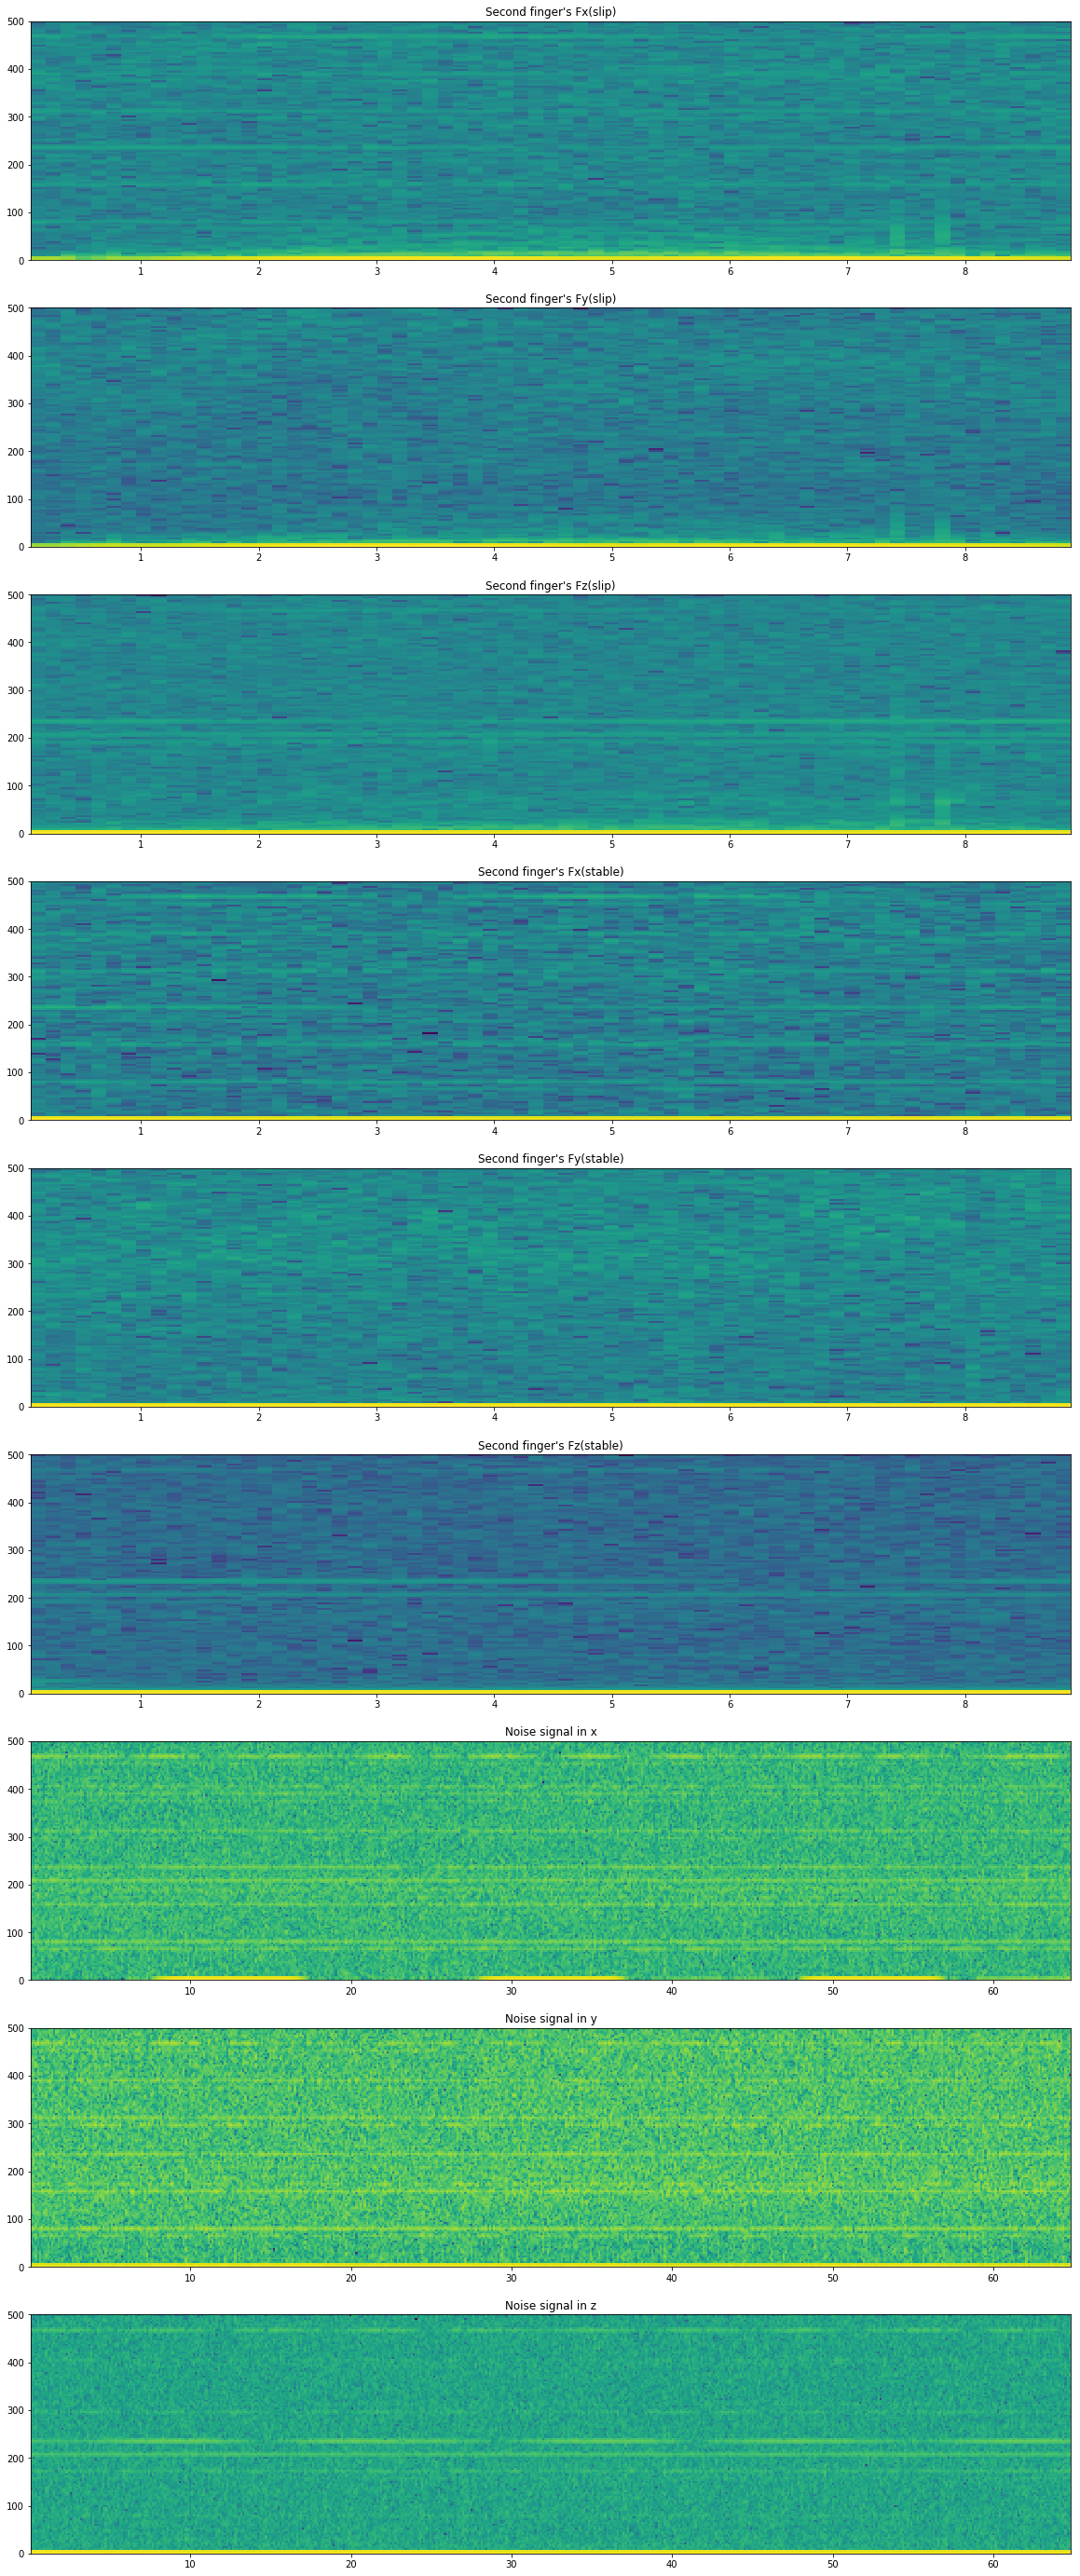

In [6]:
NFFT = 256
plt.figure(figsize=(20,50))
ax1 = plt.subplot(911)
plt.title("Second finger's Fx(slip)")
Pxx2, freqs2, bins2, im2 = plt.specgram(slip_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(912)
plt.title("Second finger's Fy(slip)")
Pxx3, freqs3, bins3, im3 = plt.specgram(slip_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(913)
plt.title("Second finger's Fz(slip)")
Pxx4, freqs4, bins4, im4 = plt.specgram(slip_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(914)
plt.title("Second finger's Fx(stable)")
Pxx5, freqs5, bins5, im5 = plt.specgram(stable_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(915)
plt.title("Second finger's Fy(stable)")
Pxx6, freqs6, bins6, im6 = plt.specgram(stable_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(916)
plt.title("Second finger's Fz(stable)")
Pxx7, freqs7, bins7, im7 = plt.specgram(stable_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(917)
plt.title("Noise signal in x")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(918)
plt.title("Noise signal in y")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(919)
plt.title("Noise signal in z")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
plt.show()


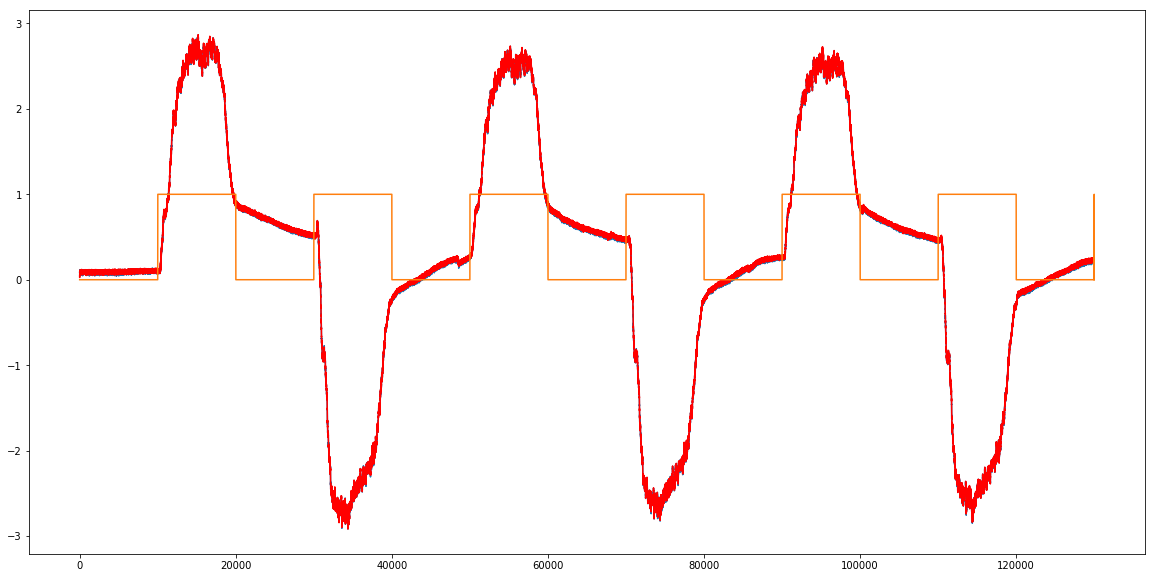

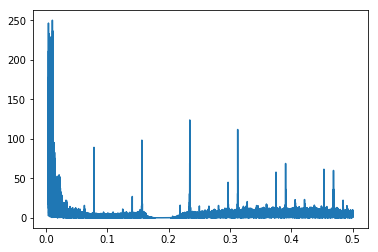

In [7]:
# Preparing f1 and f2 datasets with Band Elimination Butterworth
# Fl = 160 Hz and Fh = 210 Hz
from scipy import signal
from scipy.signal import lfilter, butter

# determine filter's parameters 
fnyquist = 0.5
fl = 0.16/fnyquist
fh = 0.22/fnyquist

b, a = signal.butter(5,[fl,fh],'bandstop')
w,h = signal.freqs(b,a)

# plt.grid(which='both', axis='both')
# plt.axvline(fl,color='green') # low cutoff frequency
# plt.hold
# plt.axvline(fh,color='green') # hig cutoff frequency
# plt.semilogx(w, 20 * np.log10(abs(h)))
# plt.show()
# ==================================================

tbf_f1 = deepcopy(f1)
tbf_f2 = deepcopy(f2)
bs_f1 = []
bs_f2 = []
for i in range(len(tbf_f1)):
    bs_f1.append(lfilter(b,a,tbf_f1[i], axis = 0))
    bs_f2.append(lfilter(b,a,tbf_f2[i], axis = 0))


# for i in range(len(filt_f1)):
#     print 0
#     print filt_f1[i].shape
    

data = np.copy(bs_f1[-5][:,0])
# y_butter = lfilter(b,a,data)
# four_data = np.abs(rfft(data, axis = 0))
# n2 = data.shape[0]
# freq2 = np.fft.rfftfreq(n2)
# print(data.shape, four_data.shape, freq2.shape)
# plt.figure(1)
# plt.plot(freq2[300:],four_data[300:])

four2 = np.abs(rfft(data, axis = 0))
nfi = data.shape[0]
freq_fi = np.fft.rfftfreq(nfi)
plt.figure(2)
plt.plot(freq_fi[500:], four2[500:])

plt.figure(1,figsize = (20,10))
plt.plot(f1[-5][:,0])
plt.hold
plt.plot(bs_f1[-5][:,0],'r')
plt.hold
plt.plot(l1[-5])


In [8]:
from_r = 1

# Get the noise's RFT for each finger
noise_signal1 = bs_f1[-1] 
noise_signal2 = bs_f2[-1]
n_sp1 = np.abs(rfft(noise_signal1, axis = 0))
n_sp2 = np.abs(rfft(noise_signal2, axis = 0))
n1 = noise_signal1.shape[0]
freq1 = np.fft.rfftfreq(n1)


# Isolate a slip and a stable part from an object
slip_signal1 = bs_f1[-5][10000:19000,:]
slip_signal2 = bs_f2[-5][10000:19000,:]
slip_sp1 = np.abs(rfft(slip_signal1, axis = 0))
slip_sp2 = np.abs(rfft(slip_signal2, axis = 0))
n2 = slip_signal1.shape[0]
freq2 = np.fft.rfftfreq(n2)
# print(freq2.shape, slip_sp2.shape)

stable_signal1 = bs_f1[-5][20000:29000,:]
stable_signal2 = bs_f2[-5][20000:29000,:]
stable_sp1 = np.abs(rfft(stable_signal1, axis = 0))
stable_sp2 = np.abs(rfft(stable_signal2, axis = 0))
n3 = stable_signal1.shape[0]
freq3 = np.fft.rfftfreq(n3)

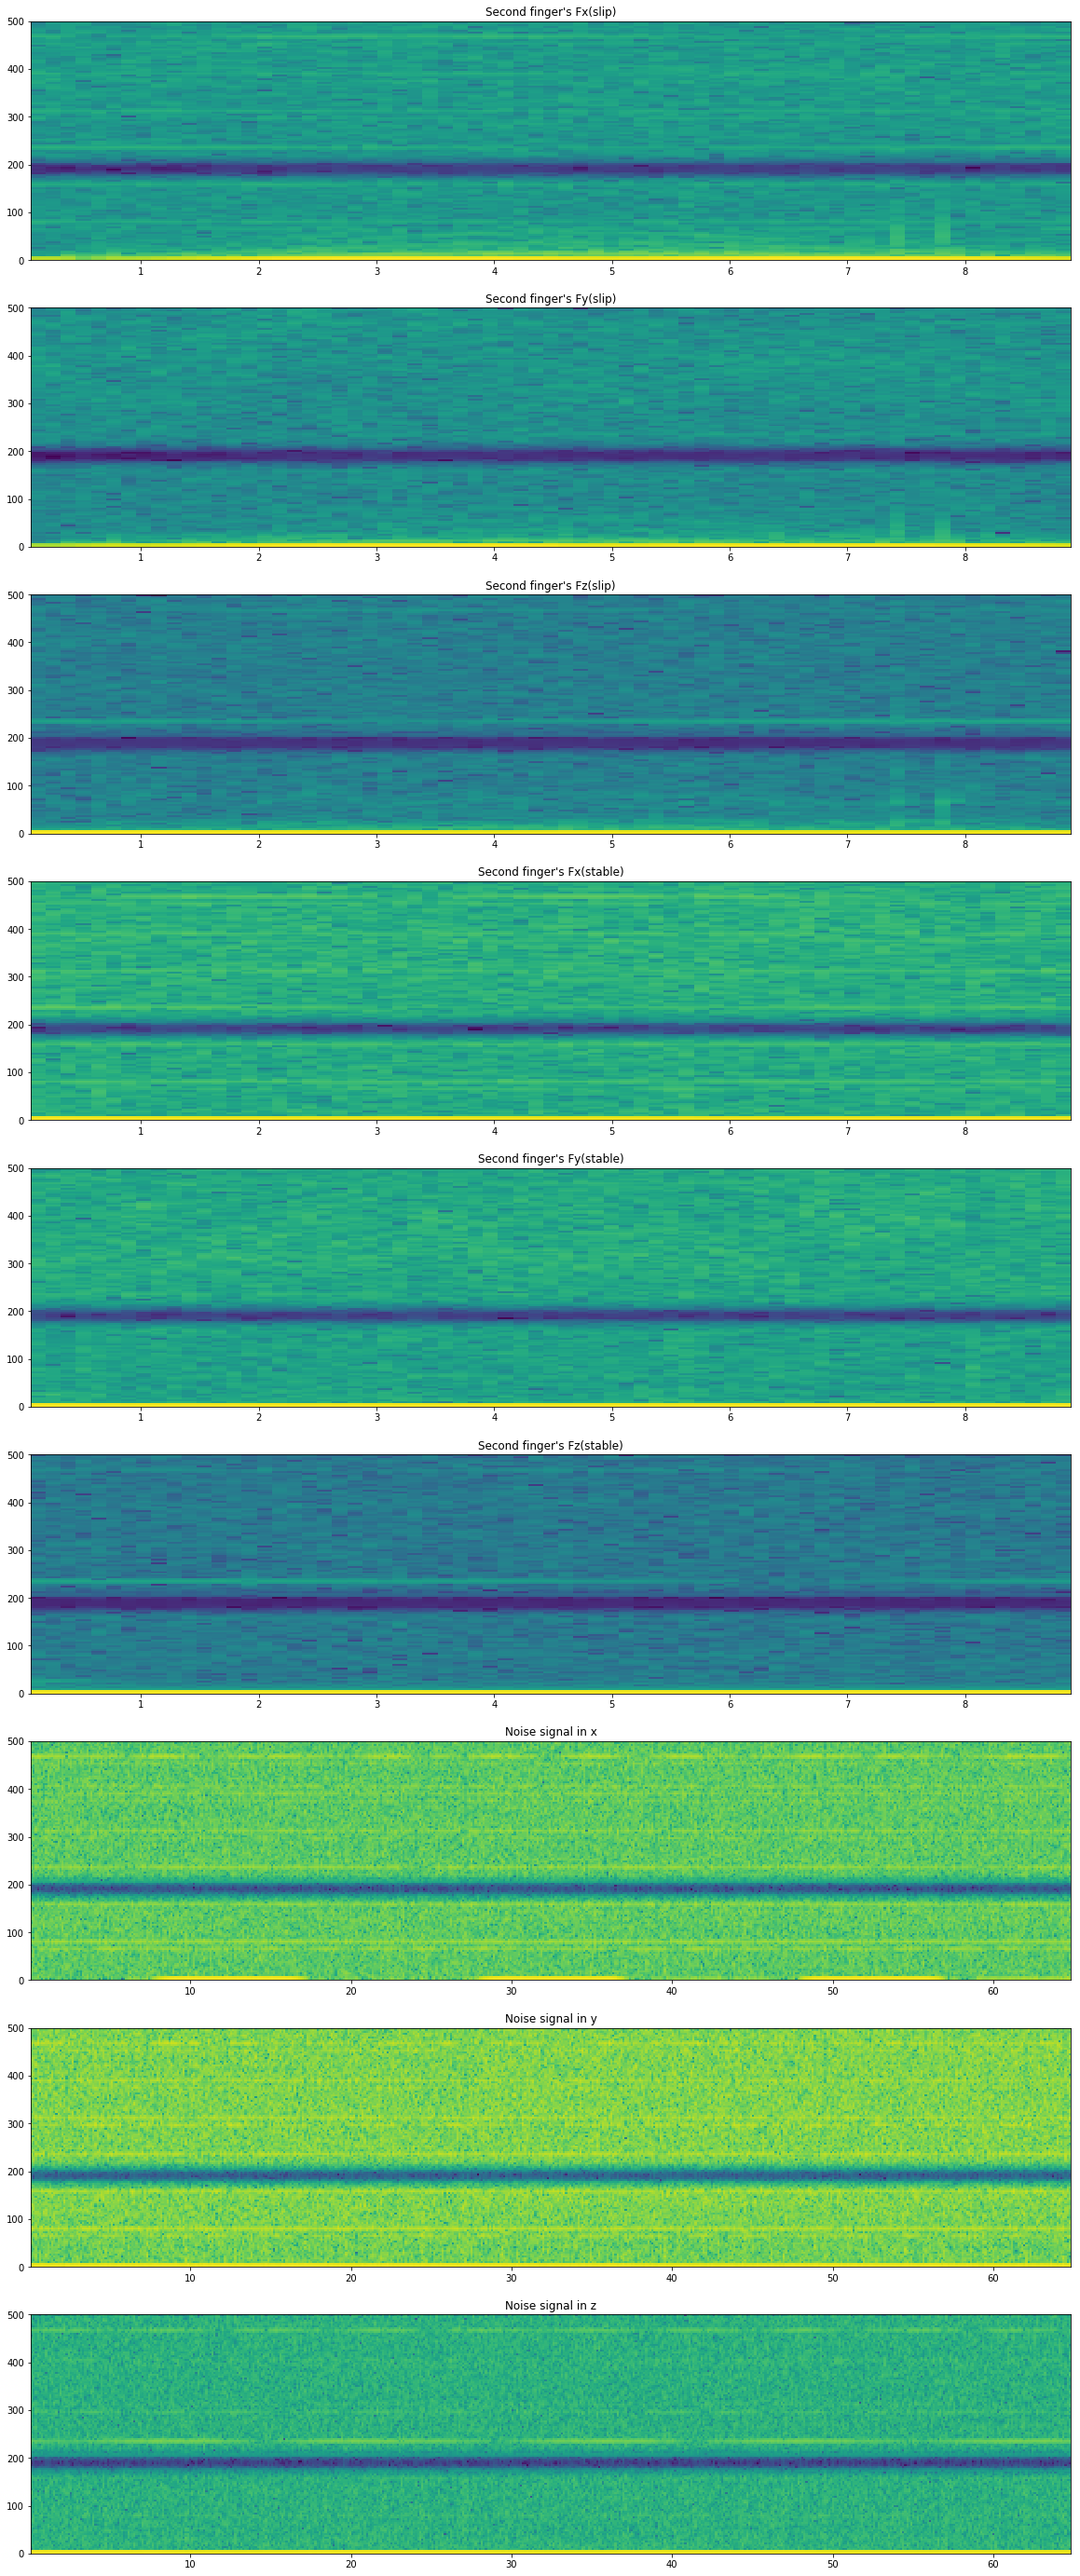

In [9]:
NFFT = 256
plt.figure(figsize=(20,50))
ax1 = plt.subplot(911)
plt.title("Second finger's Fx(slip)")
Pxx2, freqs2, bins2, im2 = plt.specgram(slip_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(912)
plt.title("Second finger's Fy(slip)")
Pxx3, freqs3, bins3, im3 = plt.specgram(slip_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(913)
plt.title("Second finger's Fz(slip)")
Pxx4, freqs4, bins4, im4 = plt.specgram(slip_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(914)
plt.title("Second finger's Fx(stable)")
Pxx5, freqs5, bins5, im5 = plt.specgram(stable_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(915)
plt.title("Second finger's Fy(stable)")
Pxx6, freqs6, bins6, im6 = plt.specgram(stable_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(916)
plt.title("Second finger's Fz(stable)")
Pxx7, freqs7, bins7, im7 = plt.specgram(stable_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(917)
plt.title("Noise signal in x")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(918)
plt.title("Noise signal in y")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(919)
plt.title("Noise signal in z")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
plt.show()

In [90]:
bs_filt_data = 'bs_filtered_data.npz'
np.savez(bs_filt_data,f1 = bs_f1, f2 = bs_f2, details = details)

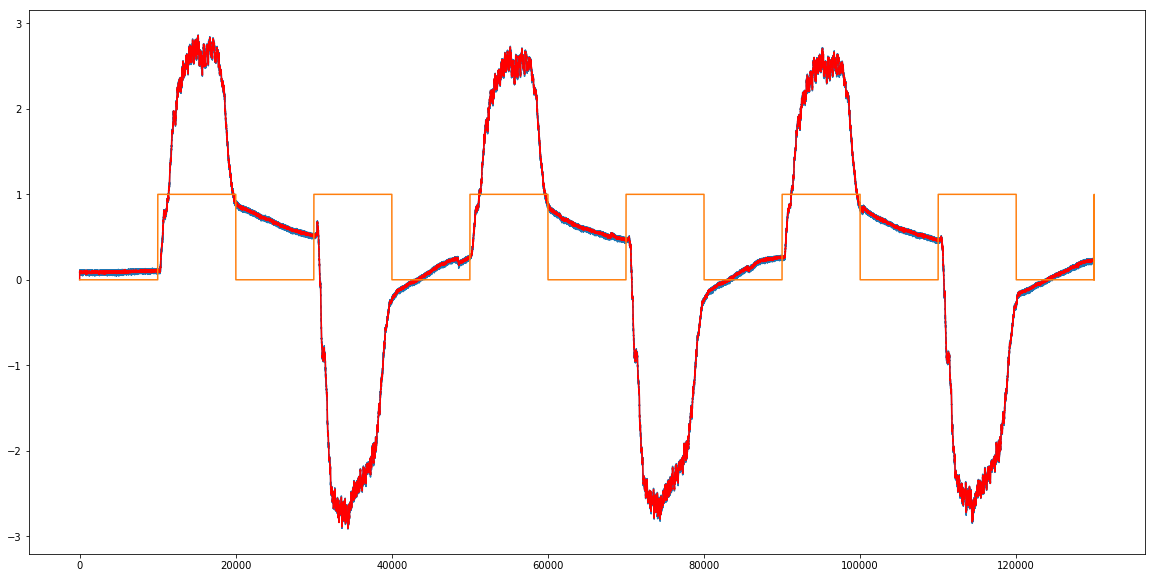

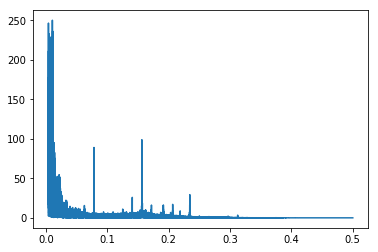

In [10]:
9
data = np.copy(lp_f1[-5][:,0])
four2 = np.abs(rfft(data, axis = 0))
nfi = data.shape[0]
freq_fi = np.fft.rfftfreq(nfi)
plt.figure(2)
plt.plot(freq_fi[500:], four2[500:])
plt.figure(1,figsize = (20,10))
plt.plot(f1[-5][:,0])
plt.hold
plt.plot(lp_f1[-5][:,0],'r')
plt.hold
plt.plot(l1[-5])


In [11]:
from_r = 1

# Get the noise's RFT for each finger
noise_signal1 = lp_f1[-1] 
noise_signal2 = lp_f2[-1]
n_sp1 = np.abs(rfft(noise_signal1, axis = 0))
n_sp2 = np.abs(rfft(noise_signal2, axis = 0))
n1 = noise_signal1.shape[0]
freq1 = np.fft.rfftfreq(n1)


# Isolate a slip and a stable part from an object
slip_signal1 = lp_f1[-5][10000:19000,:]
slip_signal2 = lp_f2[-5][10000:19000,:]
slip_sp1 = np.abs(rfft(slip_signal1, axis = 0))
slip_sp2 = np.abs(rfft(slip_signal2, axis = 0))
n2 = slip_signal1.shape[0]
freq2 = np.fft.rfftfreq(n2)
# print(freq2.shape, slip_sp2.shape)

stable_signal1 = lp_f1[-5][20000:29000,:]
stable_signal2 = lp_f2[-5][20000:29000,:]
stable_sp1 = np.abs(rfft(stable_signal1, axis = 0))
stable_sp2 = np.abs(rfft(stable_signal2, axis = 0))
n3 = stable_signal1.shape[0]
freq3 = np.fft.rfftfreq(n3)

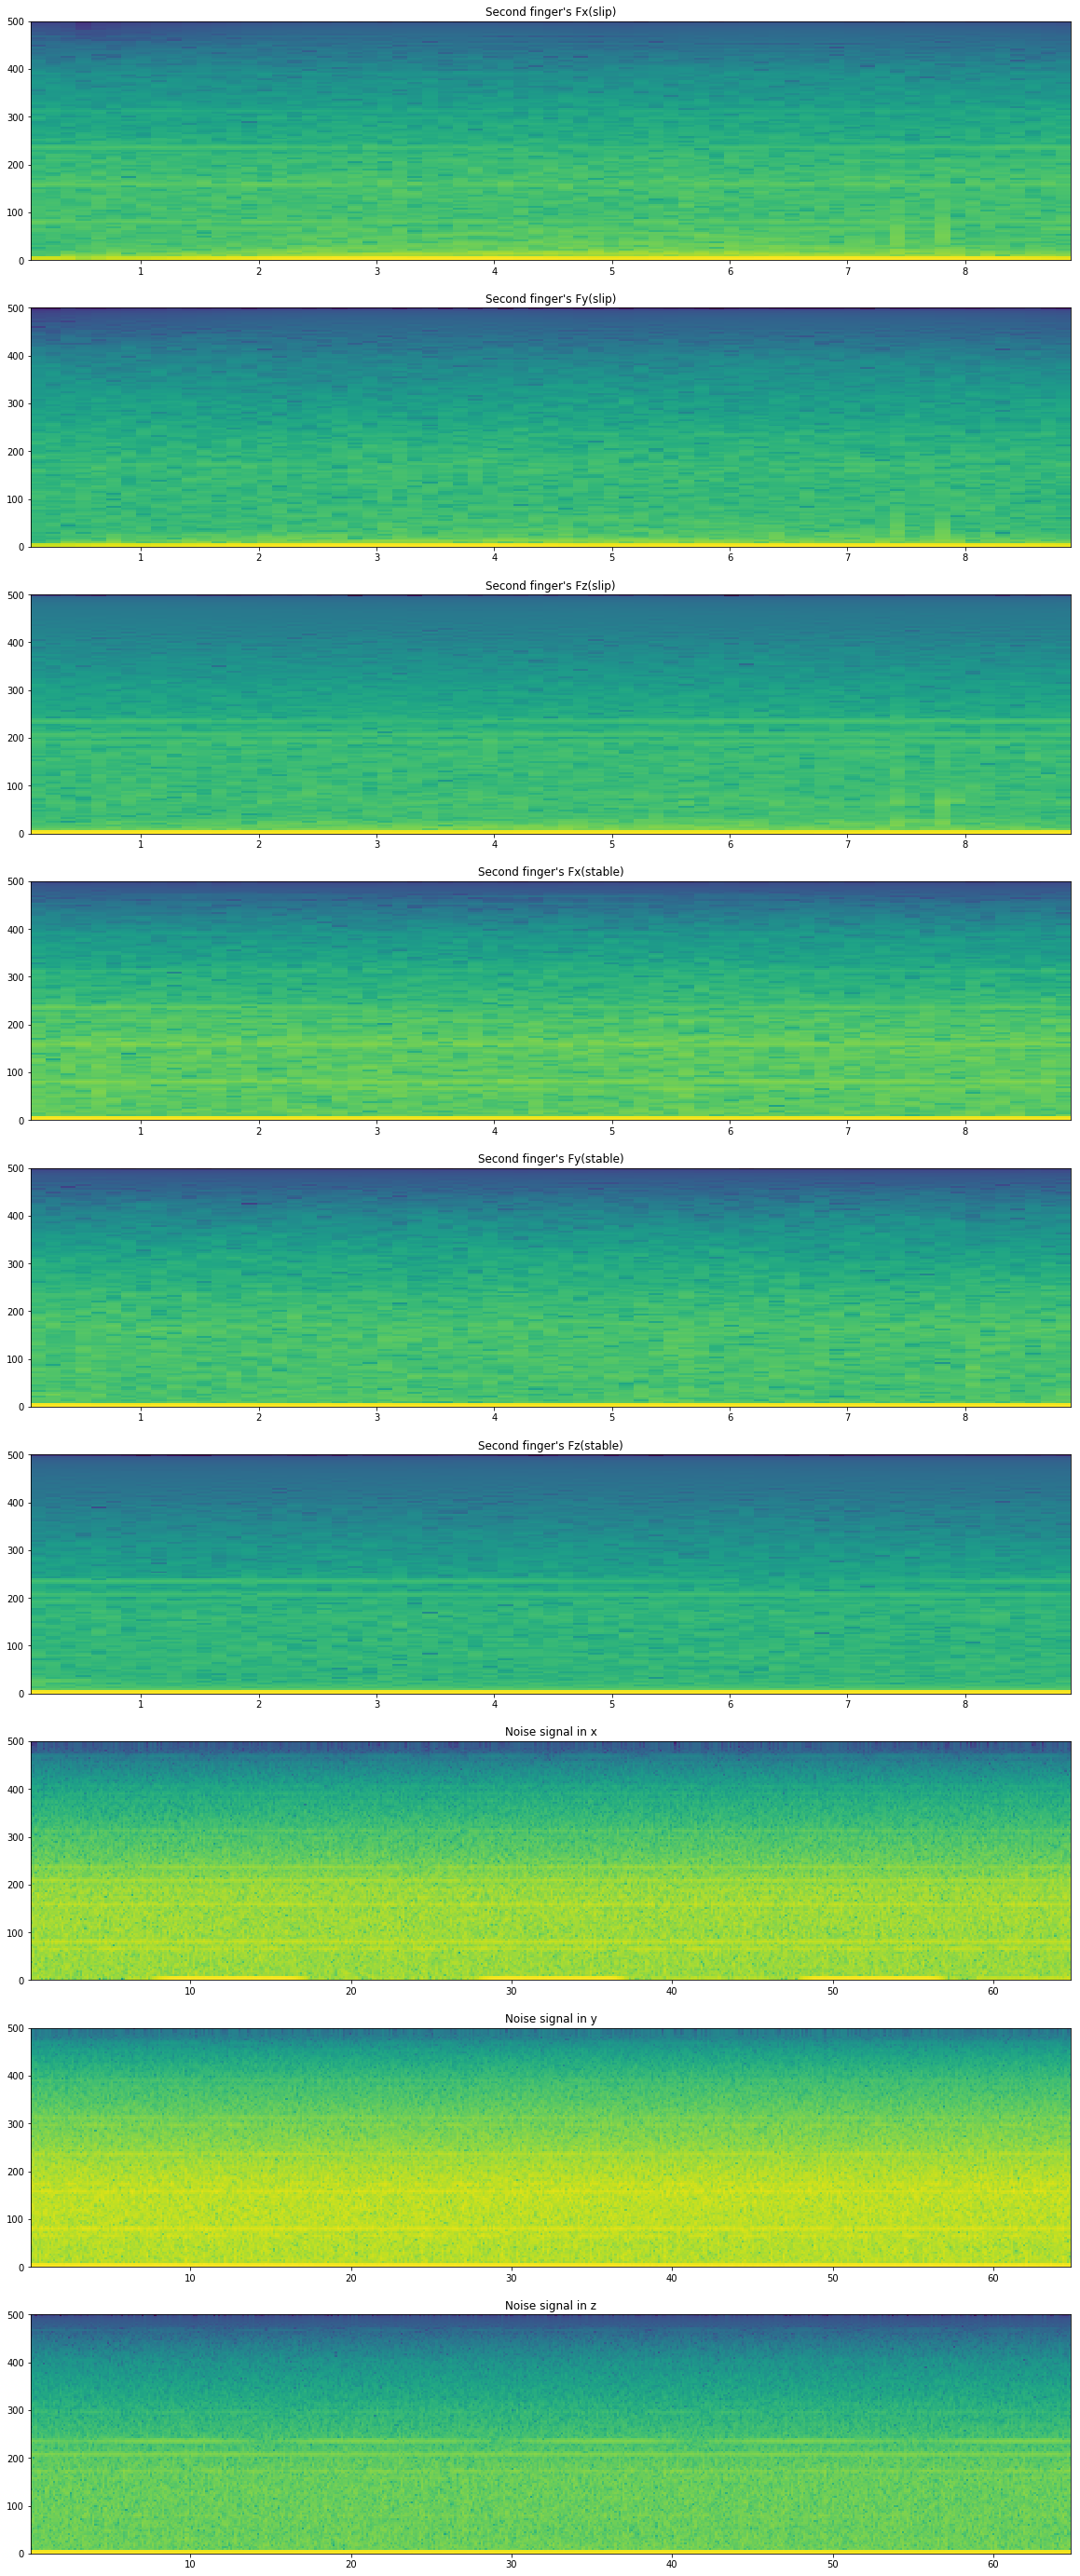

In [12]:
NFFT = 256
plt.figure(figsize=(20,50))
ax1 = plt.subplot(911)
plt.title("Second finger's Fx(slip)")
Pxx2, freqs2, bins2, im2 = plt.specgram(slip_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(912)
plt.title("Second finger's Fy(slip)")
Pxx3, freqs3, bins3, im3 = plt.specgram(slip_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(913)
plt.title("Second finger's Fz(slip)")
Pxx4, freqs4, bins4, im4 = plt.specgram(slip_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(914)
plt.title("Second finger's Fx(stable)")
Pxx5, freqs5, bins5, im5 = plt.specgram(stable_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(915)
plt.title("Second finger's Fy(stable)")
Pxx6, freqs6, bins6, im6 = plt.specgram(stable_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
ax1 = plt.subplot(916)
plt.title("Second finger's Fz(stable)")
Pxx7, freqs7, bins7, im7 = plt.specgram(stable_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(917)
plt.title("Noise signal in x")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,0], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(918)
plt.title("Noise signal in y")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,1], NFFT=NFFT, Fs=1.0/0.001)
plt.subplot(919)
plt.title("Noise signal in z")
Pxx, freqs, bins, im = plt.specgram(noise_signal2[:,2], NFFT=NFFT, Fs=1.0/0.001)
plt.show()

In [ ]:
lp_filt_data = 'lp_filtered_data.npz'
np.savez(lp_filt_data,f1 = lp_f1, f2 = lp_f2, details = details)